In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider

from scipy.stats import beta
import numpy as np


In [2]:
%matplotlib ipympl

def plot_slider_animation(alpha_estimates_list, 
                        beta_estimates_list, 
                        min_u1s_list, 
                        min_u2s_list, 
                        min_u3s_list, 
                        current_u1s_list,
                        first_frame, last_frame,
                        y_min=0, y_max=100, x_min=0, x_max=0.3):
    
    framed_time=slice(first_frame, last_frame)
    
    frame_data_list = list(zip(alpha_estimates_list[framed_time], beta_estimates_list[framed_time],
                min_u1s_list[framed_time], min_u2s_list[framed_time], min_u3s_list[framed_time],
                current_u1s_list[framed_time], 
                range(first_frame, last_frame)))
    
    
    
    a_process, b_process, min_u1, min_u2, min_u3, current_u1, start_time = frame_data_list[0]
    end_time = frame_data_list[-1][-1]
    
    fig, ax = plt.subplots(figsize=(15,7))
    
    if (a_process is not None) and (b_process is not None):
        x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
        y_process = beta.pdf(x_process, a_process, b_process)
        line_process = ax.plot(x_process, y_process, 'b-', label='distance do reference distribution')[0]
    else:
        line_process = ax.plot([], [], 'b-', label='distance to reference distribution')[0]
    
    if current_u1 is not None:    
        u1_process = ax.axvline(current_u1, ymin=0, ymax= beta.pdf(current_u1, a_process, b_process), color="blue", linestyle="dashdot", label='current u1')
    else:
        u1_process = ax.axvline(0, ymin=0, ymax= 0, color="blue", linestyle="dashdot")
        
    if min_u1 is not None:    
        u1_marker = ax.plot([min_u1], [0], marker='^', markersize=12, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([min_u2], [0], marker='^', markersize=12, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([min_u3], [0], marker='^', markersize=12, color="red", alpha=0.5, label="u3_threshold")
    else:
        u1_marker = ax.plot([], [], marker='^', markersize=12, color="green", alpha=0.5, label="u1_threshold")
        u2_marker = ax.plot([], [], marker='^', markersize=12, color="orange", alpha=0.5, label="u2_threshold")
        u3_marker = ax.plot([], [], marker='^', markersize=12, color="red", alpha=0.5, label="u3_threshold")
    
    ax.set(xlim=(x_min, x_max), xlabel='Values of Random Variable X (0, 1)',
        ylim=(y_min,y_max), ylabel='Probability density', title='Beta Distribution of pdf distances to reference distribution')
    time_legend = ax.text(0.9, 0.95, f'time: {start_time}', ha='left', va='top', transform=ax.transAxes,
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
    ax.legend(loc='lower right')

    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(left=0.25, bottom=0.25)

    # Make a horizontal slider to control the frequency.
    axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
    freq_slider = Slider(
        ax=axfreq,
        label='Time step',
        valmin=start_time,
        valmax=end_time,
        valinit=start_time,
    )
        
    # Plot the beta distribution
    def update(val):
        
        idx = int(freq_slider.val-start_time)
        a_process, b_process, min_u1, min_u2, min_u3, current_u1, time = frame_data_list[idx]

        if (a_process is not None) and (b_process is not None):
            x_process = np.linspace(beta.ppf(0.001, a_process, b_process),beta.ppf(0.999, a_process, b_process), 1000)
            y_process = beta.pdf(x_process, a_process, b_process)
            line_process.set_data(x_process, y_process)
        else:
            line_process.set_data([], [])
            
        if current_u1 is not None:    
            u1_process.set_xdata([current_u1, current_u1])
            u1_process.set_ydata([0,beta.pdf(current_u1, a_process, b_process)])
        else:
            u1_process.set_xdata([0,0])
            u1_process.set_ydata([0,0])
            
        if min_u1 is not None:    
            u1_marker[0].set_xdata([min_u1])
            u1_marker[0].set_ydata([0])
            u2_marker[0].set_xdata([min_u2])
            u2_marker[0].set_ydata([0])
            u3_marker[0].set_xdata([min_u3])
            u3_marker[0].set_ydata([0])
        else:
            u1_marker[0].set_xdata([])
            u1_marker[0].set_ydata([])
            u2_marker[0].set_xdata([])
            u2_marker[0].set_ydata([])
            u3_marker[0].set_xdata([])
            u3_marker[0].set_ydata([])
        
        time_legend.set_text(f'time: {time}')
        
        fig.canvas.draw_idle()
        
    # register the update function with each slider
    freq_slider.on_changed(update)
    # Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
    resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    button = Button(resetax, 'Reset', hovercolor='0.975')
    
    def reset(event):
        freq_slider.reset()
    
    button.on_clicked(reset)

    plt.show()

In [3]:
from random import gauss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def gaussian_histogram(mu:float, sigma:float, sample_size:int):
    bin_edges = np.linspace(-10,10,21)
    histogram, _ = np.histogram([gauss(mu, sigma) for _ in range(sample_size)], bins=bin_edges, density=True)
    return pd.Series(histogram)

In [5]:
gaussian_histogram(0, 1, 10000)

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5     0.0000
6     0.0011
7     0.0205
8     0.1325
9     0.3417
10    0.3432
11    0.1364
12    0.0230
13    0.0016
14    0.0000
15    0.0000
16    0.0000
17    0.0000
18    0.0000
19    0.0000
dtype: float64

In [6]:
from src.change_detector import detect_response
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector = PDFChangeDetector()

for i in range(500):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    print("Status:", detect_response.state.name, "| Alpha:", detect_response.alpha_estimate,"| Beta:", detect_response.beta_estimate,"\n***\n")

Status: LEARNING | Alpha: None | Beta: None 
***

Status: LEARNING | Alpha: None | Beta: None 
***

Status: LEARNING | Alpha: 39.074687821043455 | Beta: 3875.3466922308294 
***

Status: LEARNING | Alpha: 28.72030105723487 | Beta: 3045.6266543729053 
***

Status: LEARNING | Alpha: 32.385406742303914 | Beta: 3336.9052156783364 
***

Status: LEARNING | Alpha: 27.32899875475714 | Beta: 2675.269871574854 
***

Status: LEARNING | Alpha: 26.893799899745883 | Beta: 2545.6165271319255 
***

Status: LEARNING | Alpha: 30.549159143385655 | Beta: 2877.3700631432794 
***

Status: LEARNING | Alpha: 31.807642327004 | Beta: 3045.431700581862 
***

Status: LEARNING | Alpha: 33.81652184051229 | Beta: 3275.202721209277 
***

Status: LEARNING | Alpha: 37.053431417891446 | Beta: 3599.2623330526176 
***

Status: LEARNING | Alpha: 24.167462436915663 | Beta: 2243.2338144890277 
***

Status: LEARNING | Alpha: 25.976951206881154 | Beta: 2422.5584762823596 
***

Status: LEARNING | Alpha: 27.585008280965056 | Beta

In [7]:
from src.change_detector.corrected_change_detector import PDFChangeDetector


change_detector_window = PDFChangeDetector(method="window")

for i in range(200):
    new_pdf = gaussian_histogram(0, 1, 10000)
    detect_response = change_detector_window.detect_change(new_pdf)
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate,
        "| Beta :", detect_response.beta_estimate,
        "\n***\n")

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None 
***

Status:  LEARNING | Alpha : None | Beta : None

In [8]:
change_detector.current_process.__dict__

{'_monitor_method': <MonitorMethod.TRUNCATED: 0>,
 '_monitor_size': 100,
 'reference_PDF': 0     0.000000
 1     0.000000
 2     0.000000
 3     0.000000
 4     0.000000
 5     0.000025
 6     0.001330
 7     0.021105
 8     0.134365
 9     0.342370
 10    0.341605
 11    0.136160
 12    0.021670
 13    0.001310
 14    0.000060
 15    0.000000
 16    0.000000
 17    0.000000
 18    0.000000
 19    0.000000
 dtype: float64,
 'alpha_fading_pdf': 0     0.0000
 1     0.0000
 2     0.0000
 3     0.0000
 4     0.0000
 5     0.0000
 6     0.0012
 7     0.0213
 8     0.1388
 9     0.3351
 10    0.3446
 11    0.1361
 12    0.0221
 13    0.0008
 14    0.0000
 15    0.0000
 16    0.0000
 17    0.0000
 18    0.0000
 19    0.0000
 dtype: float64,
 'estimated_alpha': 19.601699877537808,
 'estimated_beta': 1538.8902291225615,
 'run_order': 500,
 'dist_geo_mean': 0.01226046138107856,
 'complementary_dist_geo_mean': 0.9874186126945356,
 'min_u1': 0.013355902685622006,
 'min_u2': 0.01605167413854929,
 '

In [9]:
from src.change_detector.corrected_change_detector import PDFChangeDetector

change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(300):
    new_pdf = gaussian_histogram(2, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(100):
    new_pdf = gaussian_histogram(2.1, 1, 10000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

Status:  LEARNING | Alpha : None | Beta None 
***

Status:  LEARNING | Alpha : None | Beta None 
***

Status:  LEARNING | Alpha : 90.62366489896677 | Beta 16432.08294533466 
***

Status:  LEARNING | Alpha : 23.414483793692742 | Beta 3757.706014354119 
***

Status:  LEARNING | Alpha : 25.4606153667516 | Beta 3934.1633092130214 
***

Status:  LEARNING | Alpha : 6.099987595008882 | Beta 756.0276219178182 
***

Status:  LEARNING | Alpha : 5.551953826001265 | Beta 622.64739801792 
***

Status:  LEARNING | Alpha : 5.865279371080867 | Beta 626.8462762859987 
***

Status:  LEARNING | Alpha : 6.324693935686814 | Beta 655.6174516938893 
***

Status:  LEARNING | Alpha : 6.777724442769658 | Beta 684.824040384882 
***

Status:  LEARNING | Alpha : 7.350985913404382 | Beta 733.0737641408548 
***

Status:  LEARNING | Alpha : 7.767972378844374 | Beta 759.0190022393244 
***

Status:  LEARNING | Alpha : 8.106339412812464 | Beta 806.377549990136 
***

Status:  LEARNING | Alpha : 8.311283206543 | Beta 807.

In [10]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [11]:
data

,0,1,2,3,4,5,6
0,LEARNING,None,None,None,None,None,None
1,LEARNING,None,None,None,None,None,None
2,LEARNING,90.623665,16432.082945,None,None,None,None
3,LEARNING,23.414484,3757.706014,None,None,None,None
4,LEARNING,25.460615,3934.163309,None,None,None,None
...,...,...,...,...,...,...,...
395,IN_CONTROL,19.579906,1548.562975,0.014691,0.018089,0.022125,0.01525
396,IN_CONTROL,19.72315,1557.57594,0.014691,0.018089,0.022125,0.015262
397,IN_CONTROL,19.541577,1547.93289,0.014691,0.018089,0.022125,0.015229
398,IN_CONTROL,19.459352,1545.506197,0.014691,0.018089,0.022125,0.015195


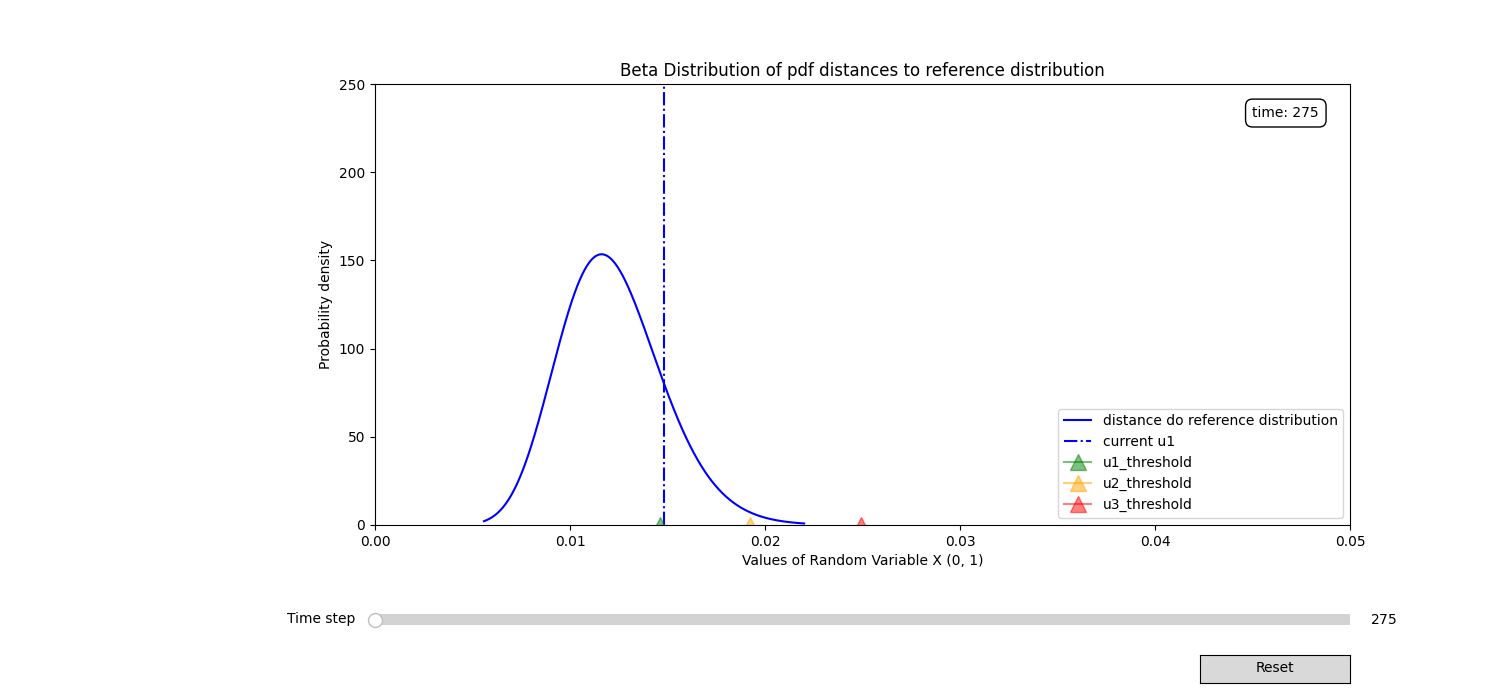

In [12]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=275, last_frame=350, y_max=250, x_max=0.05)

In [13]:
change_detector = PDFChangeDetector(reference_size=30)

detection_status_list = []
alpha_estimates_list = []
beta_estimates_list = []
u1_min_list = []
u2_min_list = []
u3_min_list = []
current_u1_list = []

for i in range(500):
    new_pdf = gaussian_histogram(2, 1, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")


for i in range(50):
    new_pdf = gaussian_histogram(2, 1.2, 1000)
    detect_response = change_detector.detect_change(new_pdf)
    
    detection_status_list.append(detect_response.state.name)
    alpha_estimates_list.append(detect_response.alpha_estimate)
    beta_estimates_list.append(detect_response.beta_estimate)
    u1_min_list.append(detect_response.min_u1)
    u2_min_list.append(detect_response.min_u2)
    u3_min_list.append(detect_response.min_u3)
    current_u1_list.append(detect_response.current_u1)
    
    print("Status: ", detect_response.state.name, 
        "| Alpha :", detect_response.alpha_estimate, 
        "| Beta", detect_response.beta_estimate, 
        "\n***\n")

Status:  LEARNING | Alpha : None | Beta None 
***

Status:  LEARNING | Alpha : None | Beta None 
***

Status:  LEARNING | Alpha : 13.332904279048964 | Beta 431.7428075994159 
***

Status:  LEARNING | Alpha : 11.445991422838441 | Beta 329.5069952127472 
***

Status:  LEARNING | Alpha : 12.603901312897355 | Beta 343.99832399638444 
***

Status:  LEARNING | Alpha : 15.030043751427872 | Beta 407.452396321195 
***

Status:  LEARNING | Alpha : 15.566240869839609 | Beta 436.0552551583028 
***

Status:  LEARNING | Alpha : 17.472599681094447 | Beta 483.5192095746349 
***

Status:  LEARNING | Alpha : 16.101354420035356 | Beta 461.2466483507014 
***

Status:  LEARNING | Alpha : 17.255006627276817 | Beta 501.4971230939215 
***

Status:  LEARNING | Alpha : 18.28356968654771 | Beta 523.4195659125642 
***

Status:  LEARNING | Alpha : 19.786777400662263 | Beta 563.0846756895866 
***

Status:  LEARNING | Alpha : 17.873712094567555 | Beta 492.64896916706806 
***

Status:  LEARNING | Alpha : 14.017077435

In [14]:
data = pd.DataFrame([detection_status_list, alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list]).T

In [15]:
data

,0,1,2,3,4,5,6
0,LEARNING,None,None,None,None,None,None
1,LEARNING,None,None,None,None,None,None
2,LEARNING,13.332904,431.742808,None,None,None,None
3,LEARNING,11.445991,329.506995,None,None,None,None
4,LEARNING,12.603901,343.998324,None,None,None,None
...,...,...,...,...,...,...,...
545,IN_CONTROL,15.929729,385.868673,0.048406,0.058789,0.070947,0.04923
546,IN_CONTROL,16.169124,392.834911,0.048406,0.058789,0.070947,0.049021
547,IN_CONTROL,15.753625,379.199643,0.048406,0.058789,0.070947,0.049582
548,IN_CONTROL,15.951864,385.211611,0.048406,0.058789,0.070947,0.04937


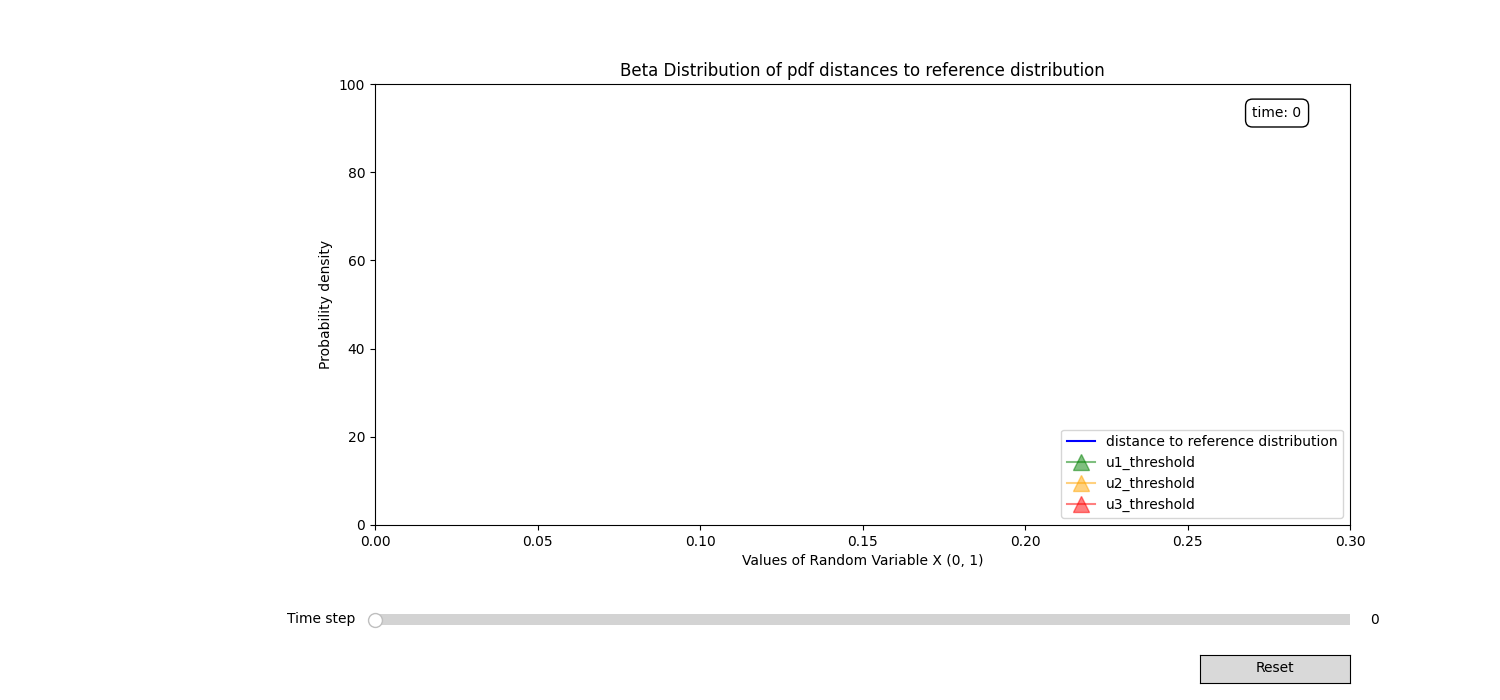

In [16]:
plot_slider_animation(alpha_estimates_list, beta_estimates_list, u1_min_list, u2_min_list, u3_min_list, current_u1_list, first_frame=0, last_frame=550)